# 2. **Data Wrangling**

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution. 

## 1. Loading datasets

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

st_data = pd.read_csv("./datasets/student_data.csv")
print(st_data.head())

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

## 2. Cleaning datasets

In [ ]:
print("Missing values per column:\n", st_data.isnull().sum())

# Fill missing numeric values with the median
numeric_cols = st_data.select_dtypes(include=[np.number]).columns
st_data[numeric_cols] = st_data[numeric_cols].fillna(st_data[numeric_cols].median())

# Handle inconsistencies in categorical data
st_data['PlaceofBirth'] = st_data['PlaceofBirth'].str.capitalize()
st_data['NationalITy'] = st_data['NationalITy'].str.upper()

print("\nCleaning complete. Nulls remaining:", st_data.isnull().sum().sum())

Missing values per column:
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Cleaning complete. Nulls remaining: 0


## 3. Handling the Outliers (IQR Method)

In [8]:
col_name = 'raisedhands'

Q1 = st_data[col_name].quantile(0.25)
Q3 = st_data[col_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option: Capping outliers to the bounds (instead of deleting)
st_data[col_name] = np.where(st_data[col_name] > upper_bound, upper_bound,
                             np.where(st_data[col_name] < lower_bound, lower_bound, st_data[col_name]))

print(f"Outliers for {col_name} have been capped.")

Outliers for raisedhands have been capped.


## 4. Data Transformation (Log Transformation)

In [ ]:
# Purpose: Decrease skewness and change scale for better understanding
st_data['Log_VisitedResources'] = np.log1p(st_data['VisITedResources'])

# Compare skewness
print(f"Original Skewness: {st_data['VisITedResources'].skew():.2f}")
print(f"Transformed Skewness: {st_data['Log_VisitedResources'].skew():.2f}")

Original Skewness: -0.34
Transformed Skewness: -1.33


## 5. Summary

In [10]:
print("\n--- Final Academic Performance Dataset Summary ---")
print(st_data[['raisedhands', 'VisITedResources', 'Log_VisitedResources']].describe())


--- Final Academic Performance Dataset Summary ---
       raisedhands  VisITedResources  Log_VisitedResources
count   480.000000        480.000000            480.000000
mean     46.775000         54.797917              3.664736
std      30.779223         33.080007              1.052169
min       0.000000          0.000000              0.000000
25%      15.750000         20.000000              3.044522
50%      50.000000         65.000000              4.189655
75%      75.000000         84.000000              4.442651
max     100.000000         99.000000              4.605170


## 6. Box Plot

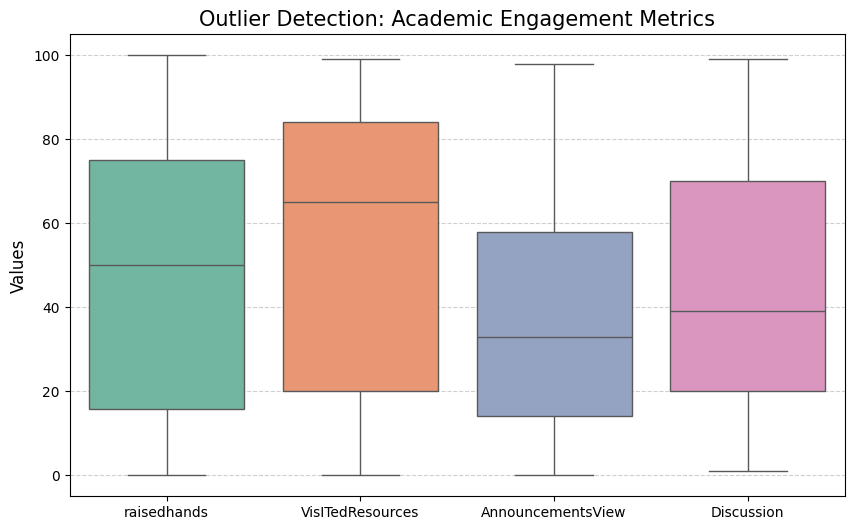

In [ ]:
numeric_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=st_data[numeric_cols], palette="Set2")

plt.title('Outlier Detection: Academic Engagement Metrics', fontsize=15)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
